# Validation Metrics for Classification

Scikit-learn covers extensively the classification validation metrics [[here](http://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)]. The ones presented here are:
- Accuracy Score
- Precision
- Recall
- F1-Score
- ROC and AUROC

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, \
    recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
%matplotlib inline 

# Load some example scores
The example data (from binary classification), presented next, contains:
- Column 1: **`scores`** or *probas* (output of `predict_proba()`) in the range [0, 1]
- Column 2: **`target`** or actual outcome (y truth)


In [2]:
df_results = pd.read_csv('../data/classifier_prediction_scores.csv')
print('Number of rows:', df_results.shape[0])
df_results.head()

Number of rows: 1250


,scores,target
0,0.288467,0
1,0.255047,1
2,0.201017,0
3,0.729307,1
4,0.148288,0


Let's take a look at the scores distribution. As an output of the `predict_proba()`, the scores range is [0, 1].

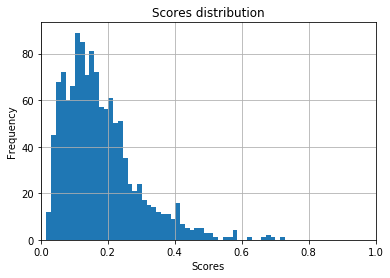

In [3]:
df_results['scores'].hist(bins=50)
plt.ylabel('Frequency')
plt.xlabel('Scores')
plt.title('Scores distribution')
plt.xlim(0, 1)
plt.show()

# Classification Metrics
## Accuracy score
The [accuracy_score](http://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score) is the fraction (default) or the count (normalize=False) of correct predictions. It is given by:  

$$ A = \frac{TP + TN}{TP + TN + FP + FN} $$

Where, TP is the True Positives, TN the True Negatives, FP the False Positives, and False Negative.

Disavantages:
- Not recommended its use in highly imbalanced datasets.
- You have to set a threshold for the output of the classifiers.

In [67]:
# Specifying the threshold above which the predicted label is considered 1:
threshold = 0.50
# Generate the predicted labels (above threshold = 1, below = 0)
predicted_outcome = [0 if k <= threshold else 1 for k in df_results['scores']]

In [68]:
print('Accuracy = %2.3f' % accuracy_score(df_results['target'], predicted_outcome))

Accuracy = 0.830


Looks like we have a high accuracy...

## Confusion Matrix

In [69]:
confmat = confusion_matrix(y_true=df_results['target'], y_pred=predicted_outcome)
print(confmat)

[[1032   10]
 [ 202    6]]


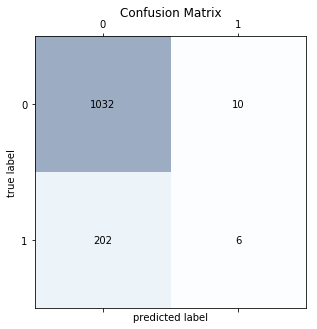

In [70]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.4)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
        s=confmat[i, j],
        va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('Confusion Matrix')
plt.show()

## Precision, Recall and F1-score
- [**Precision**](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score) is the ability of the classifier not to label as positive a sample that is negative (i.e., a measure of result relevancy).
$$ P = \frac{T_P}{T_P+F_P} $$  
  
  
- [**Recall**](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score) is the ability of the classifier to find all the positive samples (i.e., a measure of how many truly relevant results are returned).
$$ R = \frac{T_P}{T_P+F_N} $$  
  
  
- [**F1 score**](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) can be interpreted as a weighted harmonic mean of the precision and recall (in this case recall and precision are equally important).
$$ P = 2\frac{P \times R}{P+R} $$

where $T_P$ is the true positives, $F_P$ the false positives, and $F_N$ the false negatives. Further information on [precision, recall and f1-score.](http://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-and-f-measures)

First, let's check if our dataset has class imbalance:

In [71]:
df_results['target'].value_counts(normalize=True)

0    0.8336
1    0.1664
Name: target, dtype: float64

Yes! Approximately 83% of the labels are 0. Let's take a look at the other metrics more appropriate for this type of datasets:

In [72]:
print('Precision score = %1.3f' % precision_score(df_results['target'], predicted_outcome))
print('Recall score = %1.3f' % recall_score(df_results['target'], predicted_outcome))
print('F1 score = %1.3f' % f1_score(df_results['target'], predicted_outcome))

Precision score = 0.375
Recall score = 0.029
F1 score = 0.054


As you can see, the results actually not so good as the accuracy metric would show us.

## Receiver Operating Characteristic (ROC) and Area Under the ROC (AUROC)

The ROC is very common for binary classification problems. It is created by plotting the fraction of true positives out of the positives (TPR = true positive rate) vs. the fraction of false positives out of the negatives (FPR = false positive rate), at various threshold settings.  
- The [**`roc_curve`**](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) compute Receiver operating characteristic (ROC)
- The [**`roc_auc_score`**](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) function computes the area under the receiver operating characteristic (ROC) curve. The curve information is summarized in one number.  

Unlike the previous metrics, the ROC functions above require the actual scores/probabilities (and not the predicted labels). Further information on [roc_curve and roc_auc_score](http://scikit-learn.org/stable/modules/model_evaluation.html#receiver-operating-characteristic-roc). This metric is rather useful for imbalanced datasets.

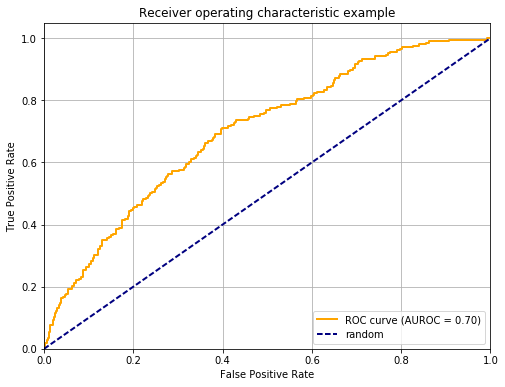

In [46]:
fpr, tpr, thresholds = roc_curve(df_results['target'], df_results['scores'])
roc_auc = roc_auc_score(df_results['target'], df_results['scores'])

# Plot ROC Curve
plt.figure(figsize=(8,6))
lw = 2
plt.plot(fpr, tpr, color='orange', lw=lw, label='ROC curve (AUROC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()